# **The Foundation of Applied Machine Learning**
## Spring 2019

### Instructor: [**Prof. Bahram Mobasher**](http://faculty.ucr.edu/~mobasher/)
### Teaching Assistance: [**Abtin Shahidi**](https://abtinshahidi.github.io/) email *abtin.shahidi--at--email.ucr.edu*

### Course webpage: [https://abtinshahidi.github.io/teaching/2019-spring-foundation-machine-learning](https://abtinshahidi.github.io/teaching/2019-spring-foundation-machine-learning)



# **Week 6**

## Machine Learning: Regression 

"Heaviliy based on _Artificial Intelligence: A Modern Approach_" Chap. 18 


We have already worked with the idea of regression when we were fitting line through our data set. But first let's talk about **supervised learning** algorithms in general. 


## Supervised learning:


These are the concepts to know:

### Training set:

Imagine that you have $N$ example such as $(\vec{x}_1, y_1)$, $(\vec{x}_2, y_2)$, ... $(\vec{x}_N, y_N)$. In which $\vec{x}$ is the vector of features, and $y$ is the output of that given $\vec{x}$.

We assume that there is an underlying function that give the values for each $y_i$, so basically $y = f(\vec{x})$. The task is to find the a function $g$ that is best representation of the unknown $f$.


Notice that we did not talk about $\vec{x} \in \mathbb{R}^n $. They can get any value and not restricted to numbers.


### Hypothesis:

Our approximation function $g$ is called hypothesis. And our task is to find the best hypothesis in the space of all the possible hypotheses or **hypothesis space** ($\mathbb{H}$). As you can see we are not looking to find $f$, so there are more than one hypothesis that can fall into our confidence interval.



### Test set:

The way we can make sure that we are on the right track and to monitor our hypothesis performance we separate the original data set into trainging and test sets in a random manner. Basically, we make sure that we have two disctint sets of examples.


So we are trying to learn from the training data to come up with the "best" hypothesis. We do not required $f$ to be deterministic. So we can even learn from the stochastic function by coming up with the $p(y|\vec{x})$.


When we have a finite set of values for $y$ the call the learning problem **classification** and it is also known as Boolean or binary classification when we have only **two** possible oucomes. 


But when we are dealing with a real-valued numbers we call the learning problem **regression**. And we are not trying to find the "real" value of $y$, we are only interested in a conditional excpectation of $y$ or $p(y|\vec{x})$.

We have already saw an example for both, fitting curve for regresson and K-neareset neighbours for classification. 

Now let's go back to our regression problem: 

$$
\begin{equation*}
y_i = f(\vec{x})
\end{equation*}
$$

And let's assume that we have a $n$ dimensional array of inputs for each example. (Array of features)

$$
\begin{equation*}
g(\vec{x}_j) = w_0 + \sum_{i=1}^n w_i x_{j, i}
\end{equation*}
$$

For convenience we can add a dummy feature $x_{j,0} = 1$. So we can write:

$$
\begin{equation*}
g(\vec{x}_j) = \sum_{i=0}^n w_i x_{j, i} = \vec{w}_i . \vec{x}_j = \vec{w}^\intercal \vec{x}_j
\end{equation*}
$$


The vector $\vec{w}^*$ is the best answer, by minimizing the squared-error loss on all of the examples: 


$$
\begin{equation*}
\vec{w}^* = argmin_w \sum_j L_2(y_j, \vec{w}.\vec{x_j})
\end{equation*}
$$


We can find the value for $\vec{w^*}$ by solving the matrix equation analytically.

$$
\begin{equation*}
\vec{w}^\intercal = (X^\intercal X)^{-1} X^\intercal \vec{y}
\end{equation*}
$$


In which $X$ is the matrix of the data. Let's look at an example:

In [4]:
import numpy as np 
import random 
import matplotlib.pyplot as plt


# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

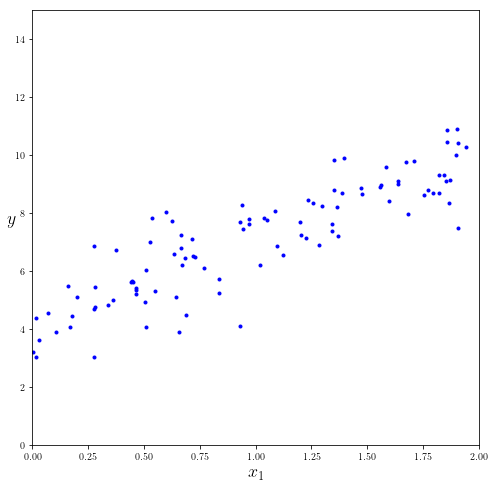

In [18]:
plt.figure(figsize=(8,8))

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)



plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.axis([0, 2, 0, 15])


plt.show()

In [19]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

In [20]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [21]:
theta_best

array([[4.16205528],
       [2.93281784]])

In [22]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.16205528],
       [10.02769095]])

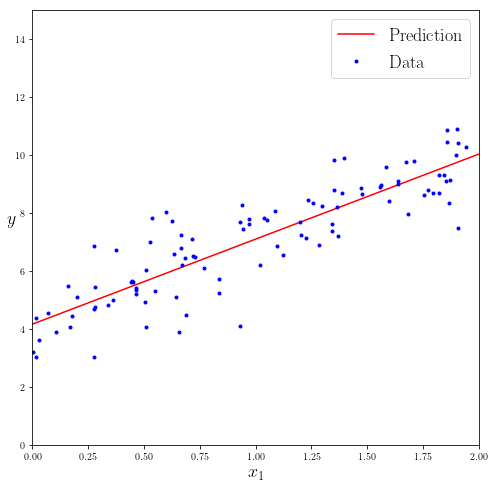

In [23]:
plt.figure(figsize=(8,8))

plt.plot(X_new, y_predict, "r-", label="Prediction")
plt.plot(X, y, "b.", label="Data")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.legend(fontsize = 18)
plt.axis([0, 2, 0, 15])


plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.16205528]), array([[2.93281784]]))

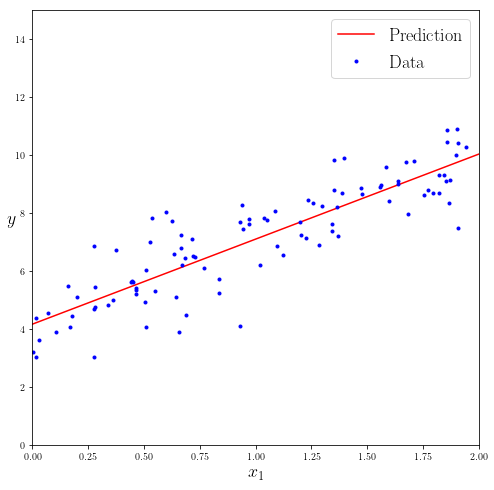

In [32]:
plt.figure(figsize=(8,8))

x_span = np.linspace(0, 2, 100)
X_span = x_span.reshape((len(x_span), 1))


plt.plot(x_span, lin_reg.predict(X_span), "r-", label="Prediction")
plt.plot(X, y, "b.", label="Data")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

plt.legend(fontsize = 18)
plt.axis([0, 2, 0, 15])


plt.show()

# Linear regression with batch gradient descent:


$$
\begin{equation*}
\vec{w}_{next} = \vec{w} - \eta \nabla_{w}{L_2(w)}
\end{equation*}
$$

In [57]:
# learning rate
eta = 0.1

n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [36]:
print(theta)
print(X_new_b.dot(theta))


[[4.16205528]
 [2.93281784]]
[[ 4.16205528]
 [10.02769095]]


In [37]:

theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

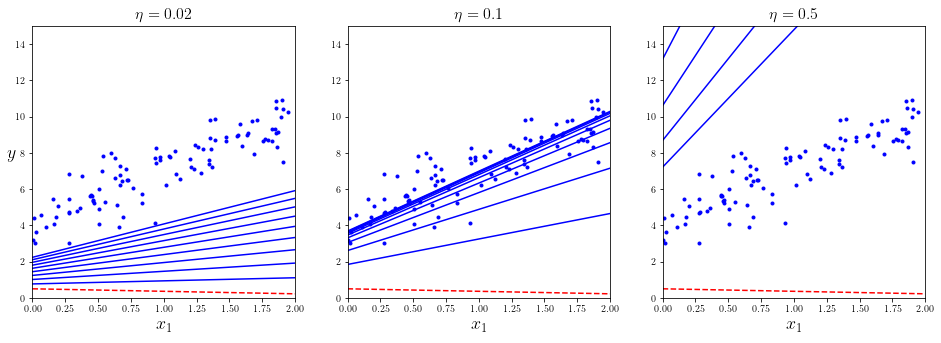

In [41]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(16,5))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

# Stochastic Gradient Descent:

In [43]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(99)

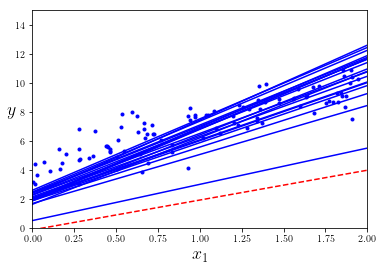

In [44]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                              


plt.show() 

In [45]:
theta


array([[4.0831642 ],
       [2.91964283]])

In [46]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.1, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=50,
       n_iter=None, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=42, shuffle=True, tol=-inf, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [47]:
sgd_reg.intercept_, sgd_reg.coef_


(array([4.11079846]), array([2.86839777]))

# Mini-batch gradient descent:

In [48]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [49]:
theta

array([[4.16465259],
       [2.9181407 ]])

In [50]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

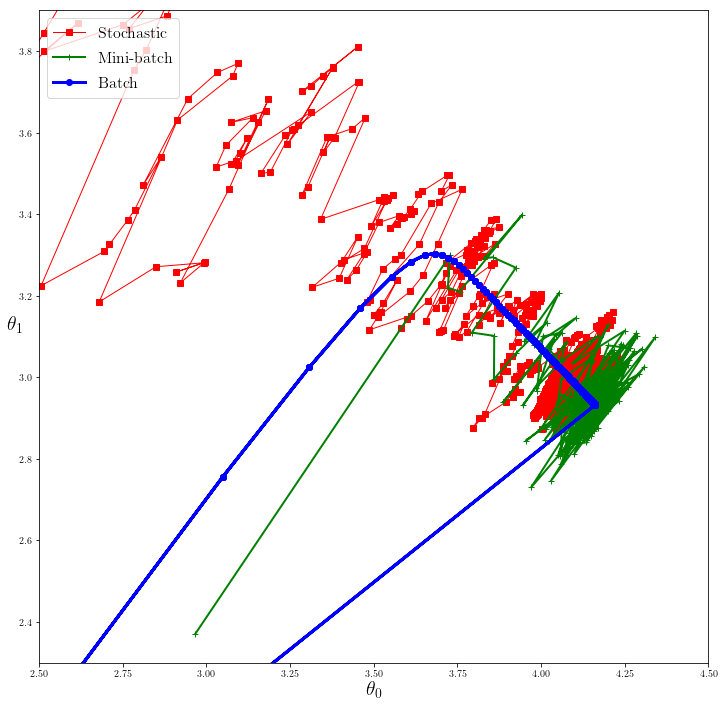

In [52]:
plt.figure(figsize=(12,12))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

plt.show()

In [54]:
class RandomForest():
    def __init__(self, x, y, n_trees, n_features, sample_sz, depth=10, min_leaf=5):
        np.random.seed(12)
        if n_features == 'sqrt':
            self.n_features = int(np.sqrt(x.shape[1]))
        elif n_features == 'log2':
            self.n_features = int(np.log2(x.shape[1]))
        else:
            self.n_features = n_features
        print(self.n_features, "sha: ",x.shape[1])    
        self.x, self.y, self.sample_sz, self.depth, self.min_leaf  = x, y, sample_sz, depth, min_leaf
        self.trees = [self.create_tree() for i in range(n_trees)]

    def create_tree(self):
        idxs = np.random.permutation(len(self.y))[:self.sample_sz]
        f_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        return DecisionTree(self.x.iloc[idxs], self.y[idxs], self.n_features, f_idxs,
                    idxs=np.array(range(self.sample_sz)),depth = self.depth, min_leaf=self.min_leaf)
        
    def predict(self, x):
        return np.mean([t.predict(x) for t in self.trees], axis=0)

def std_agg(cnt, s1, s2): return math.sqrt((s2/cnt) - (s1/cnt)**2)

class DecisionTree():
    def __init__(self, x, y, n_features, f_idxs,idxs,depth=10, min_leaf=5):
        self.x, self.y, self.idxs, self.min_leaf, self.f_idxs = x, y, idxs, min_leaf, f_idxs
        self.depth = depth
        print(f_idxs)
#         print(self.depth)
        self.n_features = n_features
        self.n, self.c = len(idxs), x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for i in self.f_idxs: self.find_better_split(i)
        if self.is_leaf: return
        x = self.split_col
        lhs = np.nonzero(x<=self.split)[0]
        rhs = np.nonzero(x>self.split)[0]
        lf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        rf_idxs = np.random.permutation(self.x.shape[1])[:self.n_features]
        self.lhs = DecisionTree(self.x, self.y, self.n_features, lf_idxs, self.idxs[lhs], depth=self.depth-1, min_leaf=self.min_leaf)
        self.rhs = DecisionTree(self.x, self.y, self.n_features, rf_idxs, self.idxs[rhs], depth=self.depth-1, min_leaf=self.min_leaf)

    def find_better_split(self, var_idx):
        x, y = self.x.values[self.idxs,var_idx], self.y[self.idxs]
        sort_idx = np.argsort(x)
        sort_y,sort_x = y[sort_idx], x[sort_idx]
        rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.

        for i in range(0,self.n-self.min_leaf-1):
            xi,yi = sort_x[i],sort_y[i]
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += yi; rhs_sum -= yi
            lhs_sum2 += yi**2; rhs_sum2 -= yi**2
            if i<self.min_leaf or xi==sort_x[i+1]:
                continue

            lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score<self.score: 
                self.var_idx,self.score,self.split = var_idx,curr_score,xi

    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf') or self.depth <= 0 
    

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
        return t.predict_row(xi)